# How to use the Vcsn library

## Writing your own code

Writing programs with Vcsn is quite simple once you're familiar with the library.

### Static

When using the static version of the library, use algorithms from the `vcsn::` namespace. These algorithms are highly templated and hence require the user to know the context and parameters of these algorithms at compile time.
This part of the library provides less flexibility but ensures that all of the required code will be compiled before runtime.

### Dyn

The dyn version of the library consists of algorithms from the `vcsn::dyn::` namespace. These algorithms provide an abstraction from the static library that hides from users the actual fully templated versions of algorithms. This allows more flexibility as the user does not have to know the context of automata at compile time and new types of automata can be created at runtime. However, algorithms may need to be compiled at runtime, lowering the program's performances (once compiled algorithms are cached and can be used without further compilation though).

## Compiling with Vcsn

Compiling your program will then require to use the Vcsn program with the compiler option and can be done as such:

    $ vcsn compile source.cc

It is also possible to modify the programs compilation options and compiler in the command line option:

    $ vcsn compile CXX='g++' CXXFLAGS+='-g3' source.cc

Run `vcsn compile --help` for additional options.

## Running the code

When actually running the program you just compiled you _might_ have to use the Vcsn program as well through the run option:

    $ vcsn run my-prog args...

The command can be followed directly by the arguments of your program.

Possibly just running `my-prog` would work too, but it depends on your setup.  In case of doubt, use `vcsn run`.

# Examples

More samples of code are present in the `tests/demo` directory of the project from which you can inspire yourself.

In [1]:
import vcsn

##  Operators of labels, expressions, etc.
This a simple example which shows how to build `dyn` labels, weights, etc. and how to manipulate them with operators such as `+`.

In [2]:
!pygmentize ../../tests/demo/operators.cc

// We really assert to do its job.
#undef NDEBUG
#include <iostream>
#include <stdexcept>
#include <string>

#include <vcsn/dyn/algos.hh>
#include <vcsn/dyn/context.hh>
#include <vcsn/dyn/automaton.hh>
#include <vcsn/misc/raise.hh>

namespace
{
  void
  expressions()
  {
    using namespace vcsn::dyn;
    // A simple context.
    auto ctx = make_context("lal, q");

    // Create an expression, and pretty-print it.
    auto e1 = make_expression(ctx, "<2>a");
    assert(format(e1) == "<2>a");
    auto e2 = make_expression(ctx, "<3>b");

    assert(format(e1 + e2) == "<2>a+<3>b");
    assert(format(e1 * e2) == "<6>(ab)");

    // e * -1 denotes e to the -1, that is e*.
    auto e = ((e1 + e2) * -1) * e1 * (e1 + e2);
    assert(format(e) == "<2>((<2>a+<3>b)*a(<2>a+<3>b))");
  }

  void
  labels()
  {
    using namespace vcsn::dyn;
    // Labels are words, not letters.
    auto ctx = make_context("law, q");

    auto a = make_label(ctx, "a");
    auto b = make_label(ctx, "b");
    auto abba

##  Manipulating automata: `prod-eval`

In [3]:
!pygmentize ../../tests/demo/prod-eval.cc

// demaille.13.ciaa
#include <iostream>
#include <stdexcept>
#include <string>

#include <vcsn/algos/read-automaton.hh>
#include <vcsn/core/mutable-automaton.hh>
#include <vcsn/ctx/lal_char_z.hh>
#include <vcsn/ctx/traits.hh>
#include <vcsn/dyn/algos.hh>
#include <vcsn/dyn/automaton.hh>
#include <vcsn/dyn/context.hh>
#include <vcsn/misc/raise.hh>

namespace vcsn
{
  namespace dyn
  {
    /// Dyn version of the read_automaton function.
    ///
    /// Read an automaton without knowing its context.
    static automaton read_automaton(const std::string& f)
    {
      auto is = open_input_file(f);
      return read_automaton(*is);
    }

    /// Read a dyn label which is a word for context ctx.
    static label read_word(const context& ctx, const std::string& w)
    {
      std::istringstream is{w};
      auto res = read_label(make_word_context(ctx), is);
      require(is.peek() == EOF, "unexpected trailing characters: ", is);
      return res;
    }
  }

  /// Static version of the read_

Compile the prod-eval program using `vcsn compile`.  To know exactly what is going on, pass the option `-v`/`--verbose`.

In [4]:
!vcsn compile -q ../../tests/demo/prod-eval.cc

Now we generate two input automata for the prod-eval program.  Here, we generate them via the command line tool `vcsn` (see [Executables](Executables.ipynb)), with the command `standard`, which corresponds to [`expression.standard`](expression.standard.ipynb).

In [5]:
!vcsn standard -C 'lal_char(01), z' -Ee '(0+1)*1(<2>0+<2>1)*' -o bin.gv
!vcsn standard -C 'lal_char(01), z' -Ee '(0+1)*0'             -o even.gv

The following automaton, `bin`, decodes binary into decimal values.

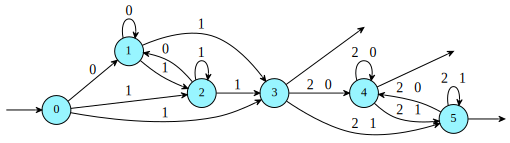

In [6]:
bin = vcsn.automaton(filename='bin.gv')
bin

This automaton, `even`, only accepts even numbers.

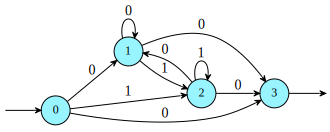

In [7]:
even = vcsn.automaton(filename='even.gv')
even

Now we run `prod-eval` to evaluate words on the synchronized product of `bin` and `even`.
The result is the value denoted by this binary number if it is even else 0.
The result is displayed twice, once for the dyn implementation and once for static one.

In [8]:
!for i in 0 1 10 1110 101010 101011;                       \
do                                                         \
    printf "%6s: " $i;                                     \
    vcsn run ../../tests/demo/prod-eval bin.gv even.gv $i; \
done

     0: 0, 0
     1: 0, 0
    10: 2, 2
  1110: 14, 14
101010: 42, 42
101011: 0, 0


For the record, this could have been done this way in Python:

In [9]:
for i in [0, 1, 10, 1110, 101010, 101011]:
    print('{:6d}: {}'.format(i, (bin & even).evaluate(i)))

     0: 0
     1: 0
    10: 2
  1110: 14
101010: 42
101011: 0
